# 01 - Introduction To Causality

## Data Science is Not What it Used to Be (or it Finally Is)
---

- Jim collins가 본 데이터 과학 -> 잘 따른 맥주
    - 맥주 (Beer) : 통계적 기초, 과학적 호기심, 복잡한 문제에 대한 열정 - 앞의 모든 가치들은 수백년동안 매우 가치있다고 증명되었어요.
    - 거품 (Foam) : 결국에 사라질 이 거품은 비현실적인 기대를 기반으로 만들어졌어요.



- 벤처캐피털 펀드인 MMC가 유럽 AI 스타트업들을 대상으로 한 설문조사에 따르면, 40%가 AI를 전혀 사용하지 않음.


- 조언
    - 첫 번째 맥주의 거품(Foam)을 무시하는 법을 배우자. 수학과 통계학은 앞으로도 계속 유용할 것이며, 해당 학문이 당장 필요하지 않다.
    - 어느 누구도 어떻게 사용해야 하는지 모르는 번지르르한 최신 도구가 아닌, 여러분의 일을 가치 있게 만드는 것이 무엇인지 배우자.
    - 마지막으로, 데이터 과학을 배움에 있어 지름길은 없다. 수학 및 통계학 지식은 습득하기 어렵기 때문에 정말 가치가 있다. 모든 사람이 할 수 있다면 초과 공급으로, 가격이 낮아진다. 그러므로, 의지를 강하게 가지고 해당 지식을 가능한 한 잘 배우자. 용감하고 진실된 사람들 (For the Brave and True)만을 위한 이 여정을 시작하는 동안 즐거운 시간 보내시길 바란다!
    
    


## Answering a Different Kind of Question
---
- Ajay Agrawal(추천시스템 저자는 다름), Joshua Gans, Avi Goldfarb는 "Prediction Machines"에서 'AI는 새로운 물결은 실제로 우리에게 지능을 가져다주는 것이 아닌, 지능의 주요 구성 요소인 예측을 가져다준다' 라고 함.
- 하지만 머신러닝은 만병통치약이 아니다. 엄격한 경계에서는 좋은 성능을 내지만, 학습데이터와 다르다면 제대로 작동하지 않을 수 있다.
- "Prediction Machines"에서는 예시로 머신러닝은 호텔산업에서 가격을 인상하면, 더 많은 객실이 팔릴 것으로 제안할 수 있다.(인과관계)


- 인과추론의 문제는 "만약에 (What If)"의 질문에 답할 것을 요구한다. 하지만 머신러닝은 상관관계 유형 예측에 의존하여 인과추론의 문제를 해결할 수 없다.
- 인과관계 질문에 대한 답은 사람들의 인식보다 훨씬 어렵다. "연관은 인과관계가 아니다"를 설명하는 것은 꽤 복잡하다.
- 책은 연관성에서 인과관계를 찾는 방법을 알아내는데 집중한다.





## When Association IS Causation
---
- 직관적으로 우리는 연관성은 인과관계가 아닌 이유를 알고 있다.
- 어떤 사람이, 태블릿을 제공하는 학교의 학생들이 더 학업 성과가 좋다고 한다면, 그 것은 아마 태블릿을 제공하는 학교에 다니는 사람들이 더 부유하기 때문이라고 지적할 수 있다.
- **이러한 이유로 우리는 학생들에게 태블릿을 제공하는 것이 학업 성과를 높이는데 도움을 줄 수있다고 결론을 지을 수 없다.(인과성 X) 우리는 단지, 학업성과와 태블릿 제공하는 것이 연관성이 있다고만 할 수 있다.**

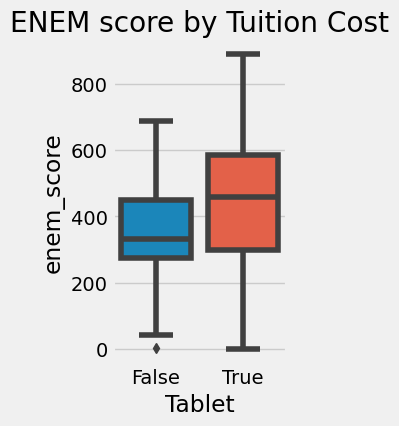

In [1]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

np.random.seed(123)
n = 100

# tuition 수업료 ~ N(1000, 300^2) 
tuition = np.random.normal(1000, 300, n).round()

# tablet 태블릿 제공 여부
# expit: Logistic function
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)

# 학업 성과 = (0.7 x 수업료 - 50 x 태블릿 제공 여부 + 200 ) + ϵ 
# ϵ ~ N(0, 200^2)
# 학업 성과|수업료,태블릿제공여부 ~ N((0.7 x 수업료 - 50 x 태블릿 제공 여부 + 200 , 200^2)

enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

plt.figure(figsize=(2,4))
sns.boxplot(y="enem_score", x="Tablet", data = data).set_title('ENEM score by Tuition Cost')
plt.show()



## 인과추론의 용어 정리

- i: unit, 실험 대상


- $T_{i}$: i에 대한 Treatment(처방, 처치, 처리) 여부
    - $
    T_i=\begin{cases}
    1 \ \text{: 실험대상 i가 Treatment를 받은 경우}\\
    0 \ \text{: 실험대상 i가 Treatment를 받지 않은 경우}\\
    \end{cases}
    $
    - 이 때, Treatment는 꼭 의료분야일 필요는 없다. 대신 효과(effect)를 알고자 하는 일부 개입(intervention)을 나타내는 데 사용할 용어이다.
    - 위에서의 T는 태플릿 제공 여부이다. $T$ 대신 $D$가 표시되는 경우도 있다.
    
    
    
- $Y_i$: 관찰된 결과 변수 (Outcome variable)
    - 우리는 Treatment (처치)가 Outcome(결과)에 영향을 미치는지 알고 싶다.
    - **인과추론의 근본적 문제:Treatment가 있든 없든 같은 실험 대상에 대해 동시에 관찰할 수 없다**
        - 이러한 문제를 해결하기 위해 **Potential Outcomes(잠재적 결과)**에 대해 많은 이야기를 한다.


- $Y_{0i}, Y_{1i}$ Potential Outcomes: 실제로 일어나지 않았으나, 일어났다면 발생할 수 있는 결과
    - 잠재적인 이유는 실제로 일어나지 않았기 때문이며, **만약 일어났다면** 어떤 결과가 나왔을지를 의미한다.
    - $Y_{0i}$ : i의 Treatment를 받지 않은 Potential Outcomes
    - $Y_{1i}$ : **같은 실험대상 i**의 Treatment를 받은 Potential Outcomes
    - 때때로, Potential Outcomes는 함수와 같이 $Y_{i}(t)$로 표현될 수 있다.
        - $Y_{0i}$는 $Y_{i}(0)$, $Y_{1i}$는 $Y_{i}(1)$ 으로 표현할 수 있으며, 이 책에서는 $Y_{0i}, Y_{1i}$으로 표기할 것이다.
        
        
- ITE & ATE & ATT/ATET
    - $Y_{1i} - Y_{0i}$: ITE(Individual Treatment Effect), 개별 처치 효과
    - $E[Y_1 - Y_0]$: ATE(Individual Treatment Effect), 평균 처치 효과
    - $E[Y_1 - Y_0 | T=1]$: ATT/ATET(Average Treatment effect on the Treated), 처치받은 그룹에 대한 평균 처치 효과
    - 인과추론의 근본적 문제(데이터로서는) ITE를 알 수 없다. 따라서, 보다 측정할 수 있는 ATE나 ATT를 확인한다.
    
    
- 우리는 두 가지 Potential Outcomes는 볼 수 없지만, '신'이 되었다고 가정하고 두 Potential Outcomes를 볼 수 있다고 가정해보자. 






In [2]:
pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[-50,0,-200,50],
))

,i,y0,y1,t,y,te
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


## References
- English: https://matheusfacure.github.io/python-causality-handbook/01-Introduction-To-Causality.html#
- Korean: https://github.com/CausalInferenceLab/Causal-Inference-with-Python/blob/main/01-Introduction-To-Causality.ipynb